In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data_dir = "drive/MyDrive/data/"
df = pd.read_csv(data_dir + "country_response_measures.csv")
df.head()

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-10,NaN
1,Austria,BanOnAllEvents,2020-11-03,NaN
2,Austria,ClosDaycare,2020-03-16,2020-05-04
3,Austria,ClosDaycarePartial,2020-11-17,2020-12-07
4,Austria,ClosHigh,2020-03-16,2020-09-30


In [4]:
countries = df['Country'].drop_duplicates().reset_index().drop(['index'], axis = 1)
countries.head()
countries.shape

(32, 1)

In [5]:
data = pd.read_csv(data_dir + "Global_Mobility_Report.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
countries = countries.Country.to_list()
data = data.loc[data['country_region'].isin(countries)]
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
156473,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-15,9.0,1.0,42.0,13.0,0.0,-2.0
156474,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-16,15.0,21.0,42.0,12.0,1.0,-2.0
156475,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-17,9.0,5.0,35.0,3.0,-4.0,0.0
156476,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-18,8.0,5.0,40.0,2.0,-4.0,0.0
156477,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-19,4.0,2.0,10.0,-1.0,-5.0,1.0


In [7]:
data['avg_retail_and_recreation_percent_change_from_baseline'] = data.groupby(['country_region','date'])['retail_and_recreation_percent_change_from_baseline'].transform('mean')
data['avg_grocery_and_pharmacy_percent_change_from_baseline'] = data.groupby(['country_region','date'])['grocery_and_pharmacy_percent_change_from_baseline'].transform('mean')
data['avg_parks_percent_change_from_baseline'] = data.groupby(['country_region','date'])['parks_percent_change_from_baseline'].transform('mean')
data['avg_transit_stations_percent_change_from_baseline'] = data.groupby(['country_region','date'])['transit_stations_percent_change_from_baseline'].transform('mean')
data['avg_workplaces_percent_change_from_baseline'] = data.groupby(['country_region','date'])['workplaces_percent_change_from_baseline'].transform('mean')
data['avg_residential_percent_change_from_baseline'] = data.groupby(['country_region','date'])['residential_percent_change_from_baseline'].transform('mean')
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline
156473,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-15,9.0,1.0,42.0,13.0,0.0,-2.0,8.282353,0.926316,35.720930,14.106667,-0.488095,-1.644444
156474,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-16,15.0,21.0,42.0,12.0,1.0,-2.0,15.944444,21.500000,32.382979,13.308824,0.647887,-1.888889
156475,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-17,9.0,5.0,35.0,3.0,-4.0,0.0,10.152778,5.902174,26.600000,2.093023,-4.742268,0.045455
156476,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-18,8.0,5.0,40.0,2.0,-4.0,0.0,9.342466,4.595745,42.090909,0.447059,-5.195876,0.534091
156477,AT,Austria,NaN,NaN,NaN,NaN,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,2020-02-19,4.0,2.0,10.0,-1.0,-5.0,1.0,4.533333,3.031579,10.088235,-4.379310,-5.721649,0.988636


In [8]:
data2 = data.drop_duplicates(['country_region','date'])
drop_cols = ['sub_region_1', 
             'sub_region_2', 
             'metro_area', 
             'iso_3166_2_code', 
             'census_fips_code', 
             'place_id', 
             'retail_and_recreation_percent_change_from_baseline', 
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline']
data_cut = data2.drop(drop_cols, axis=1)
data_cut.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline
156473,AT,Austria,2020-02-15,8.282353,0.926316,35.720930,14.106667,-0.488095,-1.644444
156474,AT,Austria,2020-02-16,15.944444,21.500000,32.382979,13.308824,0.647887,-1.888889
156475,AT,Austria,2020-02-17,10.152778,5.902174,26.600000,2.093023,-4.742268,0.045455
156476,AT,Austria,2020-02-18,9.342466,4.595745,42.090909,0.447059,-5.195876,0.534091
156477,AT,Austria,2020-02-19,4.533333,3.031579,10.088235,-4.379310,-5.721649,0.988636


In [9]:
data_cut['month'] = pd.DatetimeIndex(data_cut['date']).month
data3 = data_cut
data_cut.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline,month
156473,AT,Austria,2020-02-15,8.282353,0.926316,35.720930,14.106667,-0.488095,-1.644444,2
156474,AT,Austria,2020-02-16,15.944444,21.500000,32.382979,13.308824,0.647887,-1.888889,2
156475,AT,Austria,2020-02-17,10.152778,5.902174,26.600000,2.093023,-4.742268,0.045455,2
156476,AT,Austria,2020-02-18,9.342466,4.595745,42.090909,0.447059,-5.195876,0.534091,2
156477,AT,Austria,2020-02-19,4.533333,3.031579,10.088235,-4.379310,-5.721649,0.988636,2


In [10]:
data_cut['month_avg_retail_and_recreation_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_retail_and_recreation_percent_change_from_baseline'].transform('mean')
data_cut['month_avg_grocery_and_pharmacy_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_grocery_and_pharmacy_percent_change_from_baseline'].transform('mean')
data_cut['month_avg_parks_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_parks_percent_change_from_baseline'].transform('mean')
data_cut['month_avg_transit_stations_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_transit_stations_percent_change_from_baseline'].transform('mean')
data_cut['month_avg_workplaces_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_workplaces_percent_change_from_baseline'].transform('mean')
data_cut['month_avg_residential_percent_change_from_baseline'] = data_cut.groupby(['country_region','month'])['avg_residential_percent_change_from_baseline'].transform('mean')
data_cut.head()
data3 = data_cut

In [11]:
data_cut = data_cut.drop_duplicates(['country_region','month'])
drop_cols = ['avg_retail_and_recreation_percent_change_from_baseline', 
             'avg_grocery_and_pharmacy_percent_change_from_baseline',
             'avg_parks_percent_change_from_baseline',
             'avg_transit_stations_percent_change_from_baseline',
             'avg_workplaces_percent_change_from_baseline',
             'avg_residential_percent_change_from_baseline',
             'date']
data_cut2 = data_cut.drop(drop_cols, axis=1)
data_cut2 = data_cut2.reset_index()
del data_cut2['index']
data_cut2.head()

,country_region_code,country_region,month,month_avg_retail_and_recreation_percent_change_from_baseline,month_avg_grocery_and_pharmacy_percent_change_from_baseline,month_avg_parks_percent_change_from_baseline,month_avg_transit_stations_percent_change_from_baseline,month_avg_workplaces_percent_change_from_baseline,month_avg_residential_percent_change_from_baseline
0,AT,Austria,2,-20.023084,-1.774349,-2.337065,-16.518975,-15.228070,4.985353
1,AT,Austria,3,-45.120087,-16.331074,-26.730103,-35.369622,-28.634109,12.200037
2,AT,Austria,4,-68.132105,-28.748445,-26.464699,-52.572518,-48.440531,17.730994
3,AT,Austria,5,-33.038493,-14.597295,-7.254461,-33.290755,-29.197686,8.870231
4,AT,Austria,6,-12.210214,-11.066324,29.021631,-15.842582,-20.529373,3.633726


In [12]:
drop_cols = ['month_avg_retail_and_recreation_percent_change_from_baseline', 
             'month_avg_grocery_and_pharmacy_percent_change_from_baseline',
             'month_avg_parks_percent_change_from_baseline',
             'month_avg_transit_stations_percent_change_from_baseline',
             'month_avg_workplaces_percent_change_from_baseline',
             'month_avg_residential_percent_change_from_baseline',
             'month']
data3 = data3.drop(drop_cols, axis=1)
data3 = data3.reset_index()
del data3['index']
data3.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline
0,AT,Austria,2020-02-15,8.282353,0.926316,35.720930,14.106667,-0.488095,-1.644444
1,AT,Austria,2020-02-16,15.944444,21.500000,32.382979,13.308824,0.647887,-1.888889
2,AT,Austria,2020-02-17,10.152778,5.902174,26.600000,2.093023,-4.742268,0.045455
3,AT,Austria,2020-02-18,9.342466,4.595745,42.090909,0.447059,-5.195876,0.534091
4,AT,Austria,2020-02-19,4.533333,3.031579,10.088235,-4.379310,-5.721649,0.988636


In [13]:
france_mobility = data3.loc[data3['country_region'] == 'France']
france_mobility = france_mobility.reset_index()
del france_mobility['index']
france_mobility.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline
0,FR,France,2020-02-15,0.927273,-1.027273,27.645455,30.214953,-0.945455,-0.587156
1,FR,France,2020-02-16,10.454545,5.820755,18.345455,19.666667,-0.718182,-0.861111
2,FR,France,2020-02-17,3.190909,3.809091,15.981818,0.779817,-13.890909,3.745455
3,FR,France,2020-02-18,6.463636,3.072727,35.945455,3.183486,-12.636364,2.881818
4,FR,France,2020-02-19,-1.300000,-1.909091,17.581818,1.759259,-11.000000,1.981818


In [14]:
germany_mobility = data3.loc[data3['country_region'] == 'Germany']
germany_mobility = germany_mobility.reset_index()
del germany_mobility['index']
germany_mobility.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline
0,DE,Germany,2020-02-15,5.470588,1.352941,46.647059,10.529412,-0.235294,-1.000000
1,DE,Germany,2020-02-16,4.235294,7.823529,6.235294,3.235294,-0.823529,-0.352941
2,DE,Germany,2020-02-17,2.117647,1.117647,10.294118,-1.117647,-3.705882,0.705882
3,DE,Germany,2020-02-18,2.588235,0.705882,10.941176,-2.176471,-3.823529,1.352941
4,DE,Germany,2020-02-19,2.000000,-1.235294,2.470588,-2.882353,-4.117647,1.117647


In [15]:
france_gdp = pd.read_csv(data_dir + "france_gdp.csv")
france_gdp.head()

,date,value
0,1990-03-01,1832.0
1,1990-03-02,1860.0
2,1990-03-05,1874.0
3,1990-03-06,1872.0
4,1990-03-07,1880.0


In [16]:
france_data = pd.merge(france_mobility, france_gdp, on = 'date', how = 'left')
france_data = france_data.rename(columns={" value": "gdp"})
france_data.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline,gdp
0,FR,France,2020-02-15,0.927273,-1.027273,27.645455,30.214953,-0.945455,-0.587156,NaN
1,FR,France,2020-02-16,10.454545,5.820755,18.345455,19.666667,-0.718182,-0.861111,NaN
2,FR,France,2020-02-17,3.190909,3.809091,15.981818,0.779817,-13.890909,3.745455,NaN
3,FR,France,2020-02-18,6.463636,3.072727,35.945455,3.183486,-12.636364,2.881818,6056.82
4,FR,France,2020-02-19,-1.300000,-1.909091,17.581818,1.759259,-11.000000,1.981818,6111.24


In [17]:
germany_gdp = pd.read_csv(data_dir + "germany_gdp.csv")
germany_gdp.head()

,date,value
0,1990-11-26,1443.2
1,1990-11-27,1415.3
2,1990-11-28,1420.6
3,1990-11-29,1418.9
4,1990-11-30,1441.2


In [18]:
germany_data = pd.merge(germany_mobility, germany_gdp, on = 'date', how = 'left')
germany_data = germany_data.rename(columns={" value": "gdp"})
germany_data.head()

,country_region_code,country_region,date,avg_retail_and_recreation_percent_change_from_baseline,avg_grocery_and_pharmacy_percent_change_from_baseline,avg_parks_percent_change_from_baseline,avg_transit_stations_percent_change_from_baseline,avg_workplaces_percent_change_from_baseline,avg_residential_percent_change_from_baseline,gdp
0,DE,Germany,2020-02-15,5.470588,1.352941,46.647059,10.529412,-0.235294,-1.000000,NaN
1,DE,Germany,2020-02-16,4.235294,7.823529,6.235294,3.235294,-0.823529,-0.352941,NaN
2,DE,Germany,2020-02-17,2.117647,1.117647,10.294118,-1.117647,-3.705882,0.705882,NaN
3,DE,Germany,2020-02-18,2.588235,0.705882,10.941176,-2.176471,-3.823529,1.352941,13681.19
4,DE,Germany,2020-02-19,2.000000,-1.235294,2.470588,-2.882353,-4.117647,1.117647,13789.00


In [19]:
manufacture = pd.read_csv(data_dir + "manufacture.csv")
manufacture.head()

,TIME,GEO,INDIC_BT,NACE_R2,S_ADJ,UNIT,Value,Flag and Footnotes
0,2015M01,Belgium,Volume index of production,MIG - capital goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",82.8,NaN
1,2015M01,Belgium,Volume index of production,MIG - consumer goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",94.3,NaN
2,2015M01,Belgium,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",93.9,NaN
3,2015M01,Bulgaria,Volume index of production,MIG - capital goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",82.6,NaN
4,2015M01,Bulgaria,Volume index of production,MIG - consumer goods,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",87.6,NaN


In [20]:
manu_data = manufacture[manufacture.NACE_R2 == 'Manufacturing']
manu_data['GEO'] = manu_data['GEO'].replace(['Germany (until 1990 former territory of the FRG)'],'Germany')
manu_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TIME,GEO,INDIC_BT,NACE_R2,S_ADJ,UNIT,Value,Flag and Footnotes
2,2015M01,Belgium,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",93.9,NaN
5,2015M01,Bulgaria,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",86.0,NaN
8,2015M01,Czechia,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",88.4,NaN
11,2015M01,Denmark,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",94.6,NaN
14,2015M01,Germany,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",88.7,NaN


In [21]:
lockdown_countries = ['Austria', 
                      'Belgium', 
                      'Croatia', 
                      'Cyprus', 
                      'Czechia', 
                      'Denmark', 
                      'Estonia', 
                      'Finland', 
                      'France', 
                      'Germany', 
                      'Greece', 
                      'Hungary', 
                      'Iceland', 
                      'Ireland', 
                      'Italy', 
                      'Latvia', 
                      'Lithuania', 
                      'Luxembourg', 
                      'Malta', 
                      'Netherlands', 
                      'Norway', 
                      'Poland', 
                      'Portugal', 
                      'Romania', 
                      'Slovakia', 
                      'Slovenia', 
                      'Spain', 
                      'Sweden']
manu_data = manu_data[manu_data.GEO.isin(lockdown_countries)]
manu_data.head()

,TIME,GEO,INDIC_BT,NACE_R2,S_ADJ,UNIT,Value,Flag and Footnotes
2,2015M01,Belgium,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",93.9,NaN
8,2015M01,Czechia,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",88.4,NaN
11,2015M01,Denmark,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",94.6,NaN
14,2015M01,Germany,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",88.7,NaN
17,2015M01,Estonia,Volume index of production,Manufacturing,Unadjusted data (i.e. neither seasonally adjus...,"Index, 2015=100",89.1,NaN


In [22]:
manu_data = manu_data[manu_data.TIME.str.contains('2020')]
manu_data['month'] = manu_data['TIME'].str.slice(5, 7) 
manu_data['month'] = pd.to_datetime(manu_data['month'], format='%m')
manu_data['month'] = pd.DatetimeIndex(manu_data['month']).month
manu_data = manu_data.rename(columns={"GEO": "country_region", "Value" : "manufacturing_volume_idx_of_production"})
manu_data = manu_data[['country_region','manufacturing_volume_idx_of_production', 'month']]
manu_data.head()            

,country_region,manufacturing_volume_idx_of_production,month
6302,Belgium,113.6,3
6308,Czechia,109.5,3
6311,Denmark,124.1,3
6314,Germany,98.9,3
6317,Estonia,116.3,3


In [23]:
lockdown_mobility = data_cut2[data_cut2.country_region.isin(lockdown_countries)]
lockdown_mobility.head()

,country_region_code,country_region,month,month_avg_retail_and_recreation_percent_change_from_baseline,month_avg_grocery_and_pharmacy_percent_change_from_baseline,month_avg_parks_percent_change_from_baseline,month_avg_transit_stations_percent_change_from_baseline,month_avg_workplaces_percent_change_from_baseline,month_avg_residential_percent_change_from_baseline
0,AT,Austria,2,-20.023084,-1.774349,-2.337065,-16.518975,-15.228070,4.985353
1,AT,Austria,3,-45.120087,-16.331074,-26.730103,-35.369622,-28.634109,12.200037
2,AT,Austria,4,-68.132105,-28.748445,-26.464699,-52.572518,-48.440531,17.730994
3,AT,Austria,5,-33.038493,-14.597295,-7.254461,-33.290755,-29.197686,8.870231
4,AT,Austria,6,-12.210214,-11.066324,29.021631,-15.842582,-20.529373,3.633726


In [24]:
lockdown_mobility_manu = pd.merge(lockdown_mobility, manu_data,  how='left', on=['country_region','month'])
lockdown_mobility_manu.head()

,country_region_code,country_region,month,month_avg_retail_and_recreation_percent_change_from_baseline,month_avg_grocery_and_pharmacy_percent_change_from_baseline,month_avg_parks_percent_change_from_baseline,month_avg_transit_stations_percent_change_from_baseline,month_avg_workplaces_percent_change_from_baseline,month_avg_residential_percent_change_from_baseline,manufacturing_volume_idx_of_production
0,AT,Austria,2,-20.023084,-1.774349,-2.337065,-16.518975,-15.228070,4.985353,NaN
1,AT,Austria,3,-45.120087,-16.331074,-26.730103,-35.369622,-28.634109,12.200037,111.3
2,AT,Austria,4,-68.132105,-28.748445,-26.464699,-52.572518,-48.440531,17.730994,84.6
3,AT,Austria,5,-33.038493,-14.597295,-7.254461,-33.290755,-29.197686,8.870231,88.9
4,AT,Austria,6,-12.210214,-11.066324,29.021631,-15.842582,-20.529373,3.633726,102.7


In [25]:
data4 = lockdown_mobility_manu.drop(['country_region_code'], axis=1)
data4 = data4.reset_index()
del data4['index']
data4 = data4.dropna()
data4.head()

,country_region,month,month_avg_retail_and_recreation_percent_change_from_baseline,month_avg_grocery_and_pharmacy_percent_change_from_baseline,month_avg_parks_percent_change_from_baseline,month_avg_transit_stations_percent_change_from_baseline,month_avg_workplaces_percent_change_from_baseline,month_avg_residential_percent_change_from_baseline,manufacturing_volume_idx_of_production
1,Austria,3,-45.120087,-16.331074,-26.730103,-35.369622,-28.634109,12.200037,111.3
2,Austria,4,-68.132105,-28.748445,-26.464699,-52.572518,-48.440531,17.730994,84.6
3,Austria,5,-33.038493,-14.597295,-7.254461,-33.290755,-29.197686,8.870231,88.9
4,Austria,6,-12.210214,-11.066324,29.021631,-15.842582,-20.529373,3.633726,102.7
5,Austria,7,1.742219,-0.433249,90.035574,-2.803491,-21.952062,1.111946,110.7


In [26]:
data4 = data4[data4['manufacturing_volume_idx_of_production'] != ":"] 

In [27]:
data4['manufacturing_volume_idx_of_production'] = pd.to_numeric(data4['manufacturing_volume_idx_of_production'])

In [28]:
data4 = data4.rename(columns={'month_avg_retail_and_recreation_percent_change_from_baseline' : 'retail_and_recreation', 
                              'month_avg_grocery_and_pharmacy_percent_change_from_baseline' : 'grocery_and_pharmacy', 
                              'month_avg_parks_percent_change_from_baseline' : 'parks',
                              'month_avg_transit_stations_percent_change_from_baseline' : 'transit_stations',
                              'month_avg_workplaces_percent_change_from_baseline' : 'workplaces',
                              'month_avg_residential_percent_change_from_baseline' : 'residential',
                              'manufacturing_volume_idx_of_production' : 'manufacturing'})

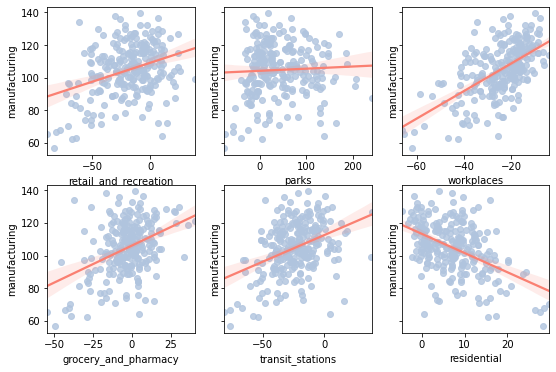

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols = 3, sharey=True, figsize=(9,6))
sn.regplot(data=data4, y='manufacturing', x='retail_and_recreation', ax = ax1[0], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
sn.regplot(data=data4, y='manufacturing', x='grocery_and_pharmacy', ax = ax2[0], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
sn.regplot(data=data4, y='manufacturing', x='parks', ax = ax1[1], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
sn.regplot(data=data4, y='manufacturing', x='transit_stations', ax = ax2[1], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
sn.regplot(data=data4, y='manufacturing', x='workplaces', ax = ax1[2], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
sn.regplot(data=data4, y='manufacturing', x='residential', ax = ax2[2], scatter_kws={"color": "lightsteelblue"}, line_kws={"color": "salmon"})
plt.show()

In [30]:
france_gdp['month'] = pd.DatetimeIndex(france_gdp['date']).month
france_gdp['year'] = pd.DatetimeIndex(france_gdp['date']).year
france_gdp = france_gdp[france_gdp.year == 2020]
france_gdp['month_gdp'] = france_gdp.groupby(['month'])[' value'].transform('mean')
france_gdp = france_gdp.drop_duplicates(['month'])
france_gdp = france_gdp[['month', 'month_gdp']]
france_gdp = france_gdp.rename(columns={"month_gdp": "gdp"})
france_gdp.head()

,month,gdp
7556,1,5997.452857
7577,2,5914.748421
7596,3,4481.844091
7618,4,4425.190500
7638,5,4489.976316


In [31]:
france_econ = data4[data4.country_region == 'France']
france_econ_data = pd.merge(france_econ, france_gdp, on = 'month', how = 'left')
france_econ_data.head()

,country_region,month,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,manufacturing,gdp
0,France,3,-44.258604,-20.323057,-26.955293,-38.998082,-33.304106,14.747459,91.9,4481.844091
1,France,4,-81.343662,-43.039768,-56.516061,-76.928279,-61.226364,26.446131,66.7,4425.190500
2,France,5,-51.172502,-16.747452,-4.565867,-53.338058,-38.556012,15.839100,73.9,4489.976316
3,France,6,-15.213789,-1.036804,47.769227,-18.478069,-18.225758,6.472404,98.5,4958.910000
4,France,7,3.136130,10.757137,158.922630,11.637180,-22.960997,3.594766,98.1,4999.556818


In [32]:
germany_gdp['month'] = pd.DatetimeIndex(germany_gdp['date']).month
germany_gdp['year'] = pd.DatetimeIndex(germany_gdp['date']).year
germany_gdp = germany_gdp[germany_gdp.year == 2020]
germany_gdp['month_gdp'] = germany_gdp.groupby(['month'])[' value'].transform('mean')
germany_gdp = germany_gdp.drop_duplicates(['month'])
germany_gdp = germany_gdp[['month', 'month_gdp']]
germany_gdp = germany_gdp.rename(columns={"month_gdp": "gdp"})
germany_gdp.head()

,month,gdp
7350,1,13362.027619
7371,2,13306.690526
7390,3,10034.256818
7412,4,10374.507000
7432,5,10972.817895


In [33]:
germany_econ = data4[data4.country_region == 'Germany']
germany_econ_data = pd.merge(germany_econ, germany_gdp, on = 'month', how = 'left')
germany_econ_data.head()

,country_region,month,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,manufacturing,gdp
0,Germany,3,-26.846300,-3.235294,13.159393,-28.844402,-19.176471,7.823529,98.9,10034.256818
1,Germany,4,-51.219608,-11.145466,40.954902,-48.088235,-38.011765,13.464706,71.1,10374.507000
2,Germany,5,-30.406072,-3.873221,59.545304,-31.810247,-23.216319,8.330171,75.7,10972.817895
3,Germany,6,-12.678431,0.023529,99.561765,-20.041176,-17.113725,4.950980,89.5,12313.648095
4,Germany,7,-1.618596,4.884250,130.747865,-13.406072,-19.447818,3.388994,92.8,12750.627727


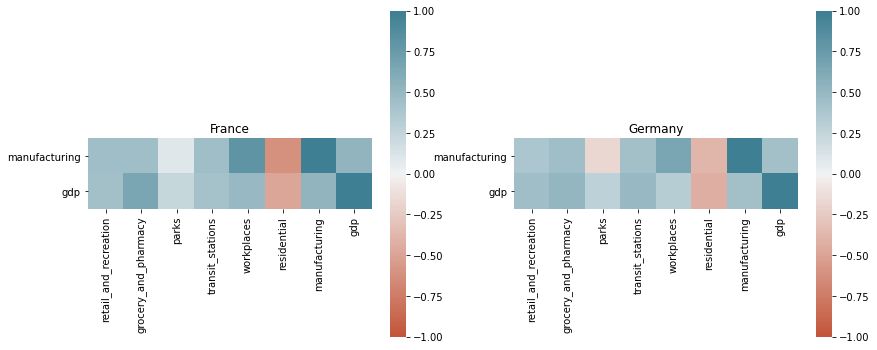

In [34]:
a4_dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(figsize=a4_dims, ncols=2)

corrMatrix = france_econ_data.loc[:, france_econ_data.columns != 'month'].corr()
x = corrMatrix[['manufacturing', 'gdp']]
y = sn.heatmap(
    x.T, 
    ax=ax1, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
y.set_title('France')

corrMatrix = germany_econ_data.loc[:, germany_econ_data.columns != 'month'].corr()
x = corrMatrix[['manufacturing', 'gdp']]
g = sn.heatmap(
    x.T, 
    ax=ax2, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
g.set_title('Germany')
plt.show()
sn.reset_defaults()